In [13]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

import matplotlib.pyplot as plt

In [14]:
def make_bar_graph(x, y, x_label, y_label, title, img_num = 0):
    plt.title(title)
    plt.bar(x, y, linewidth = 0)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.text(max(x) * .8, max(y) * .9, "Image " + str(img_num), fontsize=15)
    plt.show()    

##Looking at number of sentences in Editors Picks vs All Comments##

In [15]:
comments_db = sqlite3.connect("../john_test_4.db") # Create symbolic link to db you want to query.
cursor = comments_db.cursor()
cursor.execute("""
                SELECT n_sentences, COUNT(*) 
                FROM Features
                GROUP BY n_sentences
                """)
all_rows = cursor.fetchall()
comments_db.commit()
n_sentence_list_all_comments = [x[1] for x in all_rows]

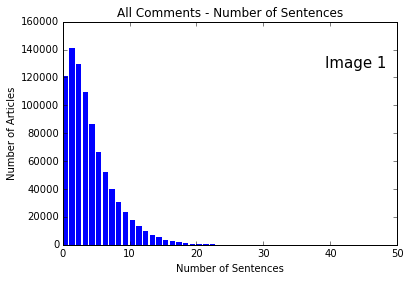

In [16]:
x = range(len(n_sentence_list_all_comments))
y = n_sentence_list_all_comments
make_bar_graph(x, y, 'Number of Sentences', 'Number of Articles', 'All Comments - Number of Sentences', 1)


In [17]:
cursor.execute("""
                SELECT n_sentences, COUNT(*) 
                FROM Features
                WHERE EditorSelection = 1
                GROUP BY n_sentences
                """)
all_rows = cursor.fetchall()
n_sentence_list_editors_picks = [x[1] for x in all_rows]


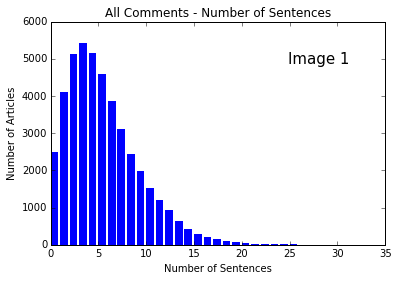

In [18]:
x = range(len(n_sentence_list_editors_picks))
y = n_sentence_list_editors_picks
make_bar_graph(x, y, 'Number of Sentences', 'Number of Articles', 'All Comments - Number of Sentences', 1)


In [19]:
def get_columns(cursor, table):
    cursor.execute("SELECT * FROM " + table + " LIMIT 1")
    return {description[0] for description in cursor.description}
    

In [20]:
for col in get_columns(cursor, "Features"):
    print col

PRP$
perc_3_char_words
Conservative
WDT
JJ
WP
Palestine
VBG
polarity
RP
FW
PRP
RB
avg_sentence_len
NNS
NNP
WRB
n_2_char_words
VBN
n_chars
n_upper
Liberal
n_exclamations
n_6_char_words
n_14_char_words
n_20_char_words
perc_9_char_words
n_novel_tags
perc_10_char_words
VBZ
perc_18_char_words
n_sentences
avg_word_len
Jaccard
n_16_char_words
perc_11_char_words
perc_13_char_words
starts_with_I
Republican
n_12_char_words
words_per_sentence
Democrat
EX
n_words
MD
n_questions
perc_17_char_words
UH
n_3_char_words
perc_5_char_words
VBD
perc_2_char_words
VBP
subjectivity
perc_16_char_words
Europe
n_13_char_words
perc_20_char_words
NN
perc_14_char_words
n_10_char_words
Disagree
n_periods
n_9_char_words
Obama
CC
PDT
CD
perc_6_char_words
perc_8_char_words
WP$
Agree
n_15_char_words
n_11_char_words
JJS
JJR
perc_1_char_words
n_4_char_words
perc_4_char_words
perc_19_char_words
n_5_char_words
n_8_char_words
God
PhD
perc_15_char_words
DT
n_18_char_words
perc_12_char_words
POS
LS
n_17_char_words
VB
EditorSel

##Computing Basic Statistics on our DB##

In [21]:
#Given a query such as "Select count(*) from Comments", returns the single number value
def get_count_from_query(query_text):
    cursor = comments_db.cursor()
    cursor.execute(query_text)
    all_rows = cursor.fetchall()
    return all_rows[0][0]


In [22]:
def feature_tester(indicator):
    overall_num_feature = get_count_from_query("""
                SELECT COUNT(*) 
                FROM Features
                WHERE """ + str(indicator) + """ = 1
                """)
    editors_selection_num_feature = float(get_count_from_query("""
                SELECT COUNT(*) 
                FROM Features
                WHERE """ + str(indicator) + """ = 1 AND EditorSelection = 1
                """))
    return (editors_selection_num_feature, overall_num_feature)

In [23]:
num_comments = get_count_from_query("""
                        SELECT COUNT(*) 
                        FROM Features
                        """)
print num_comments

866388


In [24]:
num_editor_selections = get_count_from_query("""
                        SELECT COUNT(*) 
                        FROM Features
                        WHERE EditorSelection = 1
                        """)
print num_editor_selections

43979


In [25]:
print num_editor_selections/float(num_comments)

0.0507613217173


##Looking at PhD mentions in all comments vs Editors Picks##

In [26]:
num_phd_total = get_count_from_query("""
                SELECT COUNT(*) 
                FROM Features
                WHERE PhD = 1
                """)
print num_phd_total

1353


In [27]:
num_phd_editor_selections = get_count_from_query("""
                SELECT COUNT(*) 
                FROM Features
                WHERE EditorSelection = 1 AND PhD = 1
                """)
print num_phd_editor_selections

105


In [28]:
print float(num_phd_editor_selections)/num_phd_total

0.0776053215078


In [29]:
##TODO: Chi Squared to see if PhD is statistically significant##
##b/c 7.7% is higher than 5%, but does it matter with a small sample?##

##Agree vs Disagree##

In [30]:
top, bottom = feature_tester("PhD")
print top/bottom, bottom

0.0776053215078 1353


In [31]:
top, bottom = feature_tester("starts_with_I")
print top/bottom, bottom

0.070236228131 82251


In [32]:
top, bottom = feature_tester("president")
print top/bottom, bottom

0.0595688926458 118300


In [33]:
top, bottom = feature_tester("God")
print top/bottom, bottom

0.0435852794621 16657


In [34]:
top, bottom = feature_tester("Agree")
print top/bottom, bottom

0.0738007380074 7588


In [35]:
top, bottom = feature_tester("Disagree")
print top/bottom, bottom

0.0973320158103 2024


In [36]:
top, bottom = feature_tester("Obama")
print top/bottom, bottom

0.0544884762795 135937


In [37]:
top, bottom = feature_tester("Republican")
print top/bottom, bottom

0.051975248979 105531


In [38]:
top, bottom = feature_tester("Democrat")
print top/bottom, bottom

0.0601867157858 63519


In [39]:
top, bottom = feature_tester("Conservative")
print top/bottom, bottom

0.0553560025543 25056


In [40]:
top, bottom = feature_tester("Liberal")
print top/bottom, bottom

0.0571924535197 21891


##Similarity Metrics##

In [72]:
def get_feature_average(feature, verbose=True):
    cursor.execute("""
                    SELECT AVG(""" + feature + """)
                    FROM Features
                    """)
    all_rows = cursor.fetchall()
    overall = all_rows[0][0]

    cursor.execute("""
                SELECT AVG(""" + feature + """)
                FROM Features
                WHERE EditorSelection = 0
                """)
    all_rows = cursor.fetchall()
    non_editor_selection = all_rows[0][0]
    
    cursor.execute("""
                SELECT AVG(""" + feature + """)
                FROM Features
                WHERE EditorSelection = 1
                """)
    all_rows = cursor.fetchall()
    editor_selection = all_rows[0][0]
    if verbose :
        print "Overall ", feature, " average = ", overall
        print "Non-EditorSelection ", feature, " average = ", non_editor_selection    
        print "EditorSelection ", feature, " average = ", editor_selection
    return (overall, non_editor_selection, editor_selection)
    

In [52]:
overall, non_editor_selection, editor_selection = get_feature_average("Cosine")

Overall  Jaccard  average =  0.0554931450412
Non-EditorSelection  Jaccard  average =  0.0547173869607
EditorSelection  Jaccard  average =  0.0699998511335


In [69]:
#Graph Cosine Results...

In [75]:
cursor.execute("""
                SELECT Jaccard
                FROM Features
                WHERE EditorSelection = 1
                """)
jaccard_w_editor_selection = cursor.fetchall()

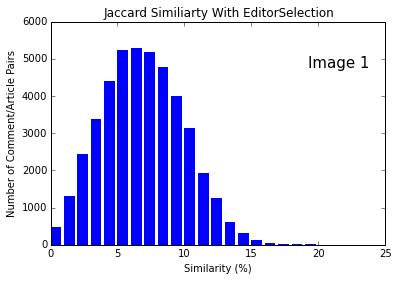

In [77]:
ys = [0]*25
for sim in jaccard_w_editor_selection:
    ys[int(sim[0] * 100)] += 1
    
make_bar_graph(range(0, 25), ys, 'Similarity (%)', 'Number of Comment/Article Pairs', 'Jaccard Similiarty With EditorSelection', 1)


In [78]:
cursor.execute("""
                SELECT Jaccard
                FROM Features
                WHERE EditorSelection = 0
                """)
jaccard_no_editor_selection = cursor.fetchall()

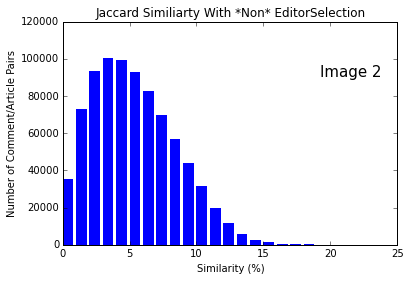

In [92]:
max_sim = 25
ys = [0]*max_sim
for sim in jaccard_no_editor_selection:
    if(int(sim[0] * 100) < max_sim):
        ys[int(sim[0] * 100)] += 1
    
make_bar_graph(range(0, max_sim), ys, 'Similarity (%)', 'Number of Comment/Article Pairs', 'Jaccard Similiarty With *Non* EditorSelection', 2)


#Some 2-axis graphs with features on each side#

In [140]:
#Jaccard vs n_words
def build_graph_for_features(feat1, feat2, num_points, title="Feature Comparison"):
    #feat1 on x-axis
    cursor = comments_db.cursor()
    select_statement = "SELECT " + feat1 + ", " + feat2 + " FROM Features WHERE EditorSelection = 1"
    cursor.execute(select_statement)
    editors_selection = cursor.fetchall()[:num_points]
    x1s = [x[0] for x in editors_selection]
    y1s = [y[1] for y in editors_selection]
    positive = plt.scatter(x1s, y1s, c='y')
    
    select_statement = "SELECT " + feat1 + ", " + feat2 + " FROM Features WHERE EditorSelection = 0 ORDER BY RANDOM()"
    cursor.execute(select_statement)
    non_editors_selection = cursor.fetchall()[:num_points]
    #Do I want to limit the non-editors picks for a percentage??? See how it looks
    x0s = [x[0] for x in non_editors_selection]
    y0s = [y[1] for y in non_editors_selection]
    negative = plt.scatter(x0s, y0s, c='r')
    
    plt.xlabel(feat1)
    plt.ylabel(feat2)
    plt.title(title)
    plt.legend([positive, negative], ["1", "0"], loc="lower right")
    
    plt.show()

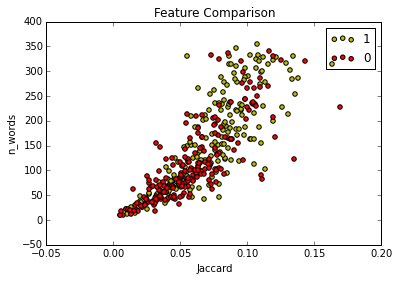

In [141]:
build_graph_for_features("Jaccard", "n_words", 200)

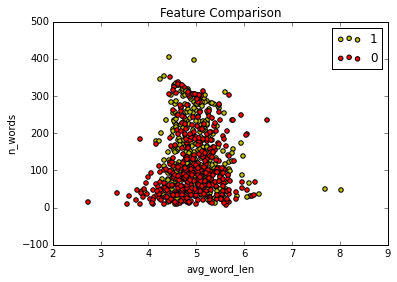

In [143]:
build_graph_for_features("avg_word_len", "n_words", 400)

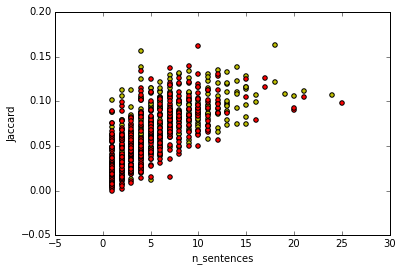

In [126]:
build_graph_for_features("n_sentences", "Jaccard", 400)

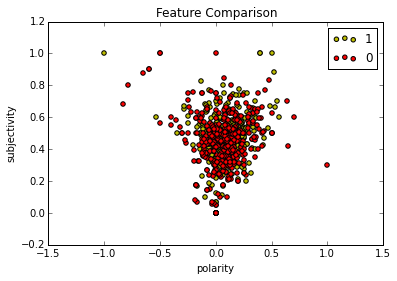

In [144]:
build_graph_for_features("polarity", "subjectivity", 400)

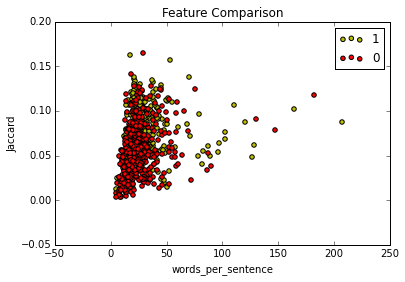

In [145]:
build_graph_for_features("words_per_sentence", "Jaccard", 400)

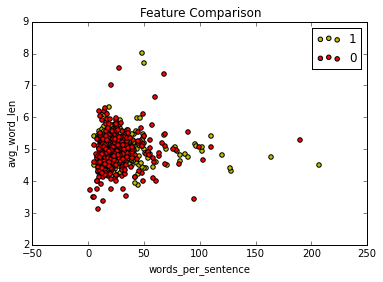

In [146]:
build_graph_for_features("words_per_sentence", "avg_word_len", 400)